Rank Filters for Image Processing
=================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour explores non-linear local filters that proceeds by
ordering the pixels in a neighboorhood and selecting a given ranked
entry.

In [1]:
using PyPlot
using NtToolBox

Continuous Rank Filtering
-------------------------
We consider an image $f : [0,1]^2 \rightarrow \RR$.


For any $\beta \in [0,1]$, we define the rank filter
$\phi_\be^B$ of order $\beta$ associated to a set $B$ to be
$$ g = \phi_\beta^B(f)
  \qwhereq
  g(x) = \inf \: \enscond{t \in \RR}{
          \mu( f^{-1}(]-\infty,t]) \cap x+B ) \geq \mu(B)/2 }. $$
where $\mu$ is the Lebesgue measure on $\RR$.


One usually assumes that $B$ is the ball of radius $\epsilon>0$
$$ B = B_\epsilon = \enscond{x}{\norm{x} \leq \epsilon}. $$


When $\be=0$ (resp. $\be=1$, resp.
$\be=1/2$), then $g(x)$ is the miniminimum
(resp. maximum, resp. median) value of $f$ in a small neighboorhood of
radius $\epsilon$
$$ \phi_0^{B_\epsilon}(f)(x) = \umin{\norm{y-x} \leq \epsilon} f(y), $$
$$ \phi_{1/2}^{B_\epsilon}(f)(x) = \umax{\norm{y-x} \leq \epsilon} f(y), $$
$$ \phi_{1}^{B_\epsilon}(f)(x) = \underset{\norm{y-x} \leq \epsilon}{\text{median}} f(y). $$


The operator $\phi_\beta^B$ is contrast-invariant, meaning that it
computes with increasing functions $ \psi : \RR \rightarrow \RR $
$$ \phi_\beta^B \circ \psi = \psi \circ \phi_\beta^B. $$
The axiomatic study of contrast invariant operator was initiated in the
comunity of mathematical morphology, see [Matheron75](#biblio), [Tukey77](#biblio), [Serra82](#biblio).


Note also that there exist generalization of rank filters (and in
particular the median filter) to vector valued images
$ f : [0,1]^2 \rightarrow \RR^d$. Since the notion of rank does not
exists anymore, one has to rely on variational caracteriation of the
median, see for instance [CasSapChu00](#biblio).


The medial filtering is the most popular rank filter.
It is particularly efficient to remove impulse noise,
see for instance [Piterbarg84](#biblio), [FanHall94](#biblio).
See also [AriasDon99](#biblio) for a theoritical analysis of median
filtering and of a two-stage iterated version.

Patches in Images
-----------------
We apply rank filters to discretized images by interpreting them as
piecewise constant functions.


Size $N = n \times n$ of the image.

In [2]:
n = 256;

256

We load an image $f_0 \in \RR^N$.

In [3]:
f0 = load_image("NtToolBox/src/data/hibiscus.png", n);

256×256 Array{Float32,2}:
 0.116279  0.110802  0.113704  0.134063  …  0.0287548  0.0287359  0.0314583
 0.118994  0.105394  0.126063  0.153145     0.0137308  0.0191786  0.0328152
 0.121933  0.131637  0.167055  0.1561       0.0191221  0.0219491  0.0383352
 0.1686    0.187318  0.194206  0.179032     0.0218771  0.0327673  0.0437247
 0.202441  0.179545  0.188899  0.180755     0.0342584  0.0396646  0.0410583
 0.236876  0.231387  0.243987  0.195669  …  0.0397783  0.0451862  0.045026 
 0.242166  0.26833   0.392237  0.219388     0.0492727  0.0520715  0.0412221
 0.227555  0.239195  0.222395  0.223745     0.0614059  0.0561919  0.0450853
 0.174463  0.192817  0.173714  0.161738     0.0588799  0.0560296  0.0411872
 0.240959  0.214167  0.198041  0.176431     0.06423    0.0561998  0.0491571
 0.233736  0.268875  0.323605  0.390379  …  0.0613594  0.0601386  0.0492048
 0.469764  0.440609  0.320349  0.217411     0.0590014  0.0561119  0.0479389
 0.217896  0.224526  0.240435  0.225365     0.0605422  0.06285

Display $f_0$.

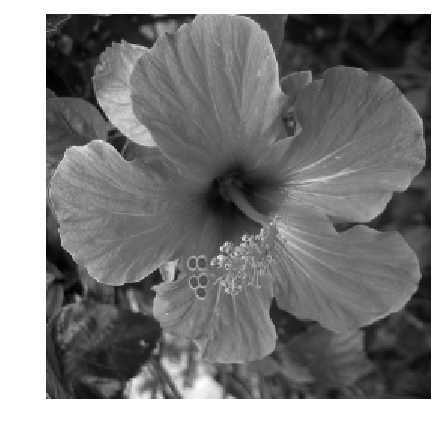

In [4]:
figure(figsize = (5,5))
imageplot(f0)

Noise level $\si$.

In [5]:
sigma = .04;

0.04

Generate a noisy image $f=f_0+\epsilon$ where $\epsilon \times
\Nn(0,\si^2\text{Id}_N)$.

In [6]:
using Distributions
f = f0 .+ sigma.*rand(Normal(), n, n);

256×256 Array{Float64,2}:
 0.114772  0.105344  0.107063  0.121441   …   0.0657353   0.0233756 
 0.110311  0.108213  0.197087  0.0939345      0.0509361   0.0141683 
 0.09125   0.194106  0.198424  0.156751       0.0495803   0.00415511
 0.157416  0.156526  0.187292  0.149025       0.0368      0.0151333 
 0.147951  0.188546  0.225104  0.240929       0.076205   -0.0366769 
 0.232034  0.218108  0.228177  0.212642   …   0.0446797   0.00278841
 0.226353  0.228391  0.389259  0.262028      -0.0398128   0.0412949 
 0.166553  0.175345  0.238151  0.157617       0.0681098   0.0232659 
 0.139443  0.233554  0.200415  0.187086       0.0425438   0.0079569 
 0.210662  0.2297    0.215615  0.15383        0.0146813  -0.0568391 
 0.13838   0.229396  0.374239  0.38232    …  -0.0396493   0.0903054 
 0.509495  0.489149  0.379413  0.261747       0.0585931   0.0405592 
 0.175538  0.194461  0.301568  0.239828       0.118492   -0.00022444
 ⋮                                        ⋱               ⋮         
 0.27061

Display $f$.

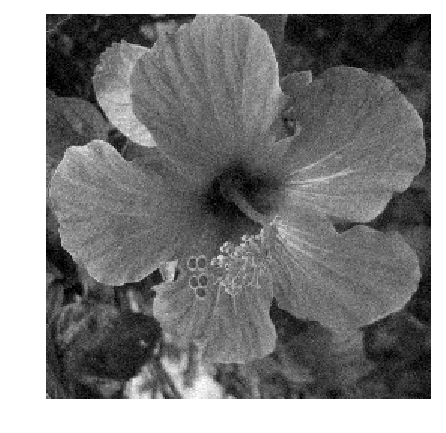

In [7]:
figure(figsize = (5,5))
imageplot(clamP(f))

For simplicity, we consider the case where
the set $B$ is a square of $w_1 \times w_2$ pixels.
where we denote $w$ to be the half width of the patches,
and $w_1=2w+1$ the full width.

In [8]:
w = 3
w1 = 2*w + 1;

7

We define the patch extraction operator
$$ p = p_x(f) \in \RR^{w_1 \times w_1}
\qwhereq \forall -w \leq s_1,s_2 \leq w, \quad p(s) = f(x+s). $$


We now define the function $\Pi(f) = (p_x(f))_x $
that extracts all possible patches.


We set up large $(n,n,w_1,w_1)$ matrices to index the the X and Y
position of the pixel to extract.

In [9]:
include("NtToolBox/src/ndgrid.jl")

(X, Y) = meshgrid(1 : n, 1 : n)
(dX, dY) = meshgrid(-w : w, -w : w)

dX = reshape(dX, (1, 1, w1, w1))
dY = reshape(dY, (1, 1, w1, w1))
X = repeat(X, inner = [1, 1, w1, w1]) + repeat(dX, inner = [n, n, 1, 1])
Y = repeat(Y, inner = [1, 1, w1, w1]) + repeat(dY, inner = [n, n, 1, 1]);

256×256×7×7 Array{Int64,4}:
[:, :, 1, 1] =
  -2   -2   -2   -2   -2   -2   -2   -2  …   -2   -2   -2   -2   -2   -2   -2
  -1   -1   -1   -1   -1   -1   -1   -1      -1   -1   -1   -1   -1   -1   -1
   0    0    0    0    0    0    0    0       0    0    0    0    0    0    0
   1    1    1    1    1    1    1    1       1    1    1    1    1    1    1
   2    2    2    2    2    2    2    2       2    2    2    2    2    2    2
   3    3    3    3    3    3    3    3  …    3    3    3    3    3    3    3
   4    4    4    4    4    4    4    4       4    4    4    4    4    4    4
   5    5    5    5    5    5    5    5       5    5    5    5    5    5    5
   6    6    6    6    6    6    6    6       6    6    6    6    6    6    6
   7    7    7    7    7    7    7    7       7    7    7    7    7    7    7
   8    8    8    8    8    8    8    8  …    8    8    8    8    8    8    8
   9    9    9    9    9    9    9    9       9    9    9    9    9    9    9
  10   10   10   10  

We handle boundary condition by reflexion.

In [10]:
X[X .< 1] = 2 .- X[X .< 1] 
Y[Y .< 1] = 2 .- Y[Y .< 1]
X[X .> n] = 2*n .- X[X .> n]
Y[Y .> n] = 2*n .- Y[Y .> n];

10752-element Array{Int64,1}:
 255
 255
 255
 255
 255
 255
 255
 255
 255
 255
 255
 255
 255
   ⋮
 255
 254
 253
 255
 254
 253
 255
 254
 253
 255
 254
 253

Patch extractor operator $\Pi$.

In [11]:
I = X + (Y-1)*n
for i in 1 : Base.div(n, w)
    for j in 1 : Base.div(n, w)
        I[i, j, :, :] = transpose(I[i, j, :, :])
    end
end
        
Pi = f -> reshape(f[I], (n, n, w1*w1))
Pi(f);

256×256×49 Array{Float64,3}:
[:, :, 1] =
 0.149025      0.156751    0.0939345  …  0.174058   0.257261   0.188708 
 0.187292      0.198424    0.197087      0.249593   0.273366   0.2474   
 0.156526      0.194106    0.108213      0.203258   0.255677   0.195508 
 0.157416      0.09125     0.110311      0.147831   0.166618   0.481993 
 0.156526      0.194106    0.108213      0.203258   0.255677   0.195508 
 0.187292      0.198424    0.197087   …  0.249593   0.273366   0.2474   
 0.149025      0.156751    0.0939345     0.174058   0.257261   0.188708 
 0.172625      0.121482    0.125642      0.226465   0.162255   0.238564 
 0.156354      0.129231    0.19552       0.236931   0.240488   0.210275 
 0.103827      0.148446    0.146989      0.318358   0.431761   0.332057 
 0.187405      0.0717975   0.165663   …  0.228651   0.167916   0.239054 
 0.211038      0.262391    0.170467      0.238519   0.223545   0.230995 
 0.268735      0.267792    0.159248      0.315574   0.292346   0.237907 
 ⋮        

We store the patches $\Pi(f)$ as a $n \times n \times w_1^2$ matrix $P$
such that, for each pixel $x$, $P(x)$ is a vector of size $w_1^2$
storing the entries of $p_x(f)$.

In [12]:
P = Pi(f);

256×256×49 Array{Float64,3}:
[:, :, 1] =
 0.149025      0.156751    0.0939345  …  0.174058   0.257261   0.188708 
 0.187292      0.198424    0.197087      0.249593   0.273366   0.2474   
 0.156526      0.194106    0.108213      0.203258   0.255677   0.195508 
 0.157416      0.09125     0.110311      0.147831   0.166618   0.481993 
 0.156526      0.194106    0.108213      0.203258   0.255677   0.195508 
 0.187292      0.198424    0.197087   …  0.249593   0.273366   0.2474   
 0.149025      0.156751    0.0939345     0.174058   0.257261   0.188708 
 0.172625      0.121482    0.125642      0.226465   0.162255   0.238564 
 0.156354      0.129231    0.19552       0.236931   0.240488   0.210275 
 0.103827      0.148446    0.146989      0.318358   0.431761   0.332057 
 0.187405      0.0717975   0.165663   …  0.228651   0.167916   0.239054 
 0.211038      0.262391    0.170467      0.238519   0.223545   0.230995 
 0.268735      0.267792    0.159248      0.315574   0.292346   0.237907 
 ⋮        

Display some example of patches.

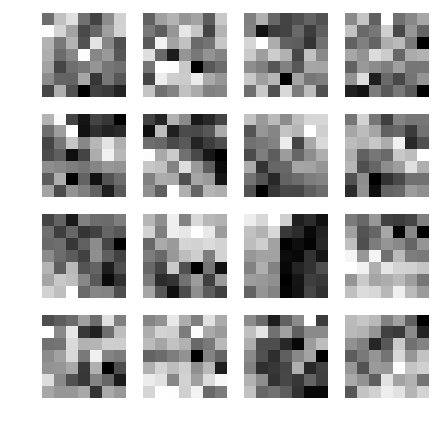

In [13]:
figure(figsize = (5,5))

for i in 1:16
    x = rand(1:n)
    y = rand(1:n)
    imageplot(reshape(P[x, y, :], (w1, w1)), "", [4, 4, i])
end

Linear Filter
-------------
A linear filter (convolution) can be computed using this patch
representation as
$$ g(x) = \sum_{i} \la_i p_x(f)_i.  $$


In the case where $\la_i=1/w_1^2$, this
defines the mean value inside the patch:
$$ g(x) = \frac{1}{w_1^2} \sum_{i} p_x(f)_i.  $$

In [14]:
Pmean = f -> mean(Pi(f), 3)
Pmean(f);

256×256×1 Array{Float64,3}:
[:, :, 1] =
 0.148283   0.154691   0.16204    …  0.282161   0.296818   0.29694  
 0.147616   0.151984   0.159783      0.286      0.300655   0.303734 
 0.143027   0.146224   0.153917      0.280187   0.296895   0.299887 
 0.141167   0.145997   0.152315      0.280011   0.294418   0.296603 
 0.144704   0.148478   0.15563       0.262443   0.268037   0.265238 
 0.153427   0.15714    0.164824   …  0.244728   0.24601    0.244591 
 0.158687   0.161211   0.172276      0.245359   0.246366   0.244366 
 0.163632   0.16667    0.178831      0.257029   0.257915   0.256602 
 0.17627    0.179749   0.188939      0.267264   0.270653   0.268242 
 0.189338   0.188915   0.198728      0.270065   0.273721   0.273194 
 0.207416   0.200286   0.209368   …  0.249557   0.25288    0.255951 
 0.221554   0.214171   0.216342      0.236418   0.2388     0.240719 
 0.229538   0.221161   0.215968      0.23267    0.235947   0.239135 
 ⋮                                ⋱                        ⋮   

Display it.

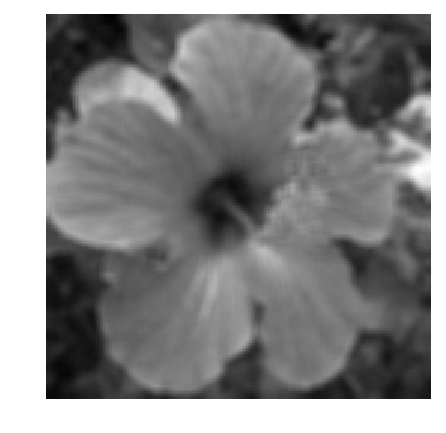

In [15]:
figure(figsize = (5,5))
imageplot(Pmean(f)[:, :])

Note that this is not a rank filter (this a linear filter) and that it is
not contrast invariant. This is shown by displaying
$$ \phi_\beta^B(f) - \psi^{-1} \circ \phi_\beta^B \circ \psi(f) $$
which is non-zero.

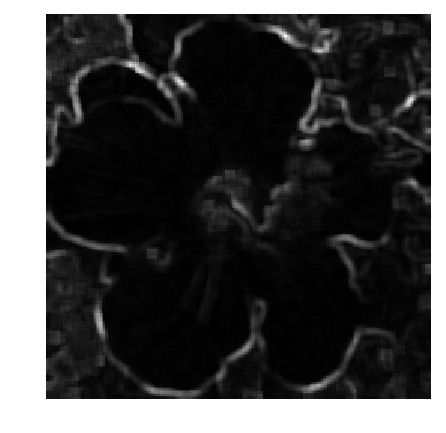

In [16]:
p = 100
psi = f -> f.^(1/p)
ipsi = f -> f.^p

figure(figsize = (5,5))
imageplot(Pmean(abs(f))[:, :] - ipsi(Pmean(psi(abs(f))))[:, :])

Opening and Closing Rank Filters
--------------------------------
We now come back to the discrete computation of a rank filter $\phi_\be^B$
for $B$ a square of width $w_1 \times w_1$ pixels.


It is defined as $g=\phi_\beta^B(f)$ where
$$ g(x) = \text{rank}_{r(\beta)}( p_x(f) ) $$
where $\text{rank}_r(v)$ extracted the element of order $k$ in the
sorted value of $v \in \RR^Q$ (here $Q=w_1^2$). More precisely, we denote
$$ v_{\si(1)} \leq v_{\si(2)} \leq \ldots \leq v_{\si(Q)} $$
where $\si \in \Sigma_Q$ is an ordering permutation, which can be
computed in $ O(N \log(N)) $ operations with the QuickSort algorithm.
Then the ranked valued is
$$ \text{rank}_r(v) = v_{\si(r)}. $$


In order to be consistent with the continuous definition of the
rank filter, one should define the rank as
$$ r=r(\beta) = \lfloor Q r \rfloor. $$

In [17]:
r = beta -> min(ceil(beta*w1*w1), w1*w1 - 1)

(::#11) (generic function with 1 method)

Shortcut for the rank filter.

In [18]:
subsample = (x, s) -> x[: , : , s]
phi = (f, beta) -> subsample(sort(Pi(f), 3), Int(r(beta)) + 1)

(::#15) (generic function with 1 method)

__Exercise 1__

Compute the rank filter for several values of $\beta$.

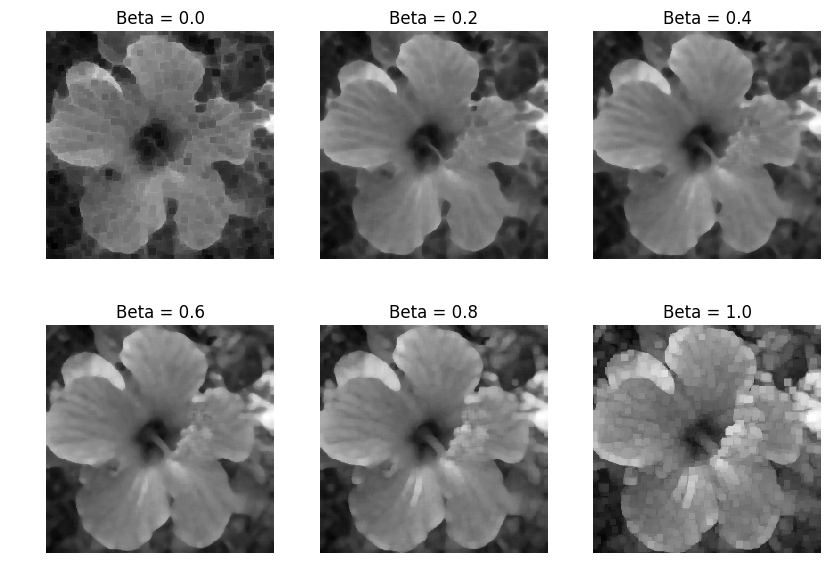

256×256 Array{Float64,2}:
 0.198424  0.240929  0.240929  0.389259  …  0.630043  0.630043  0.630043
 0.198424  0.240929  0.240929  0.389259     0.630043  0.630043  0.630043
 0.198424  0.240929  0.240929  0.389259     0.630043  0.630043  0.630043
 0.198424  0.240929  0.240929  0.389259     0.630043  0.630043  0.630043
 0.198424  0.240929  0.253447  0.407904     0.524932  0.524932  0.524932
 0.262391  0.262391  0.312458  0.407904  …  0.468698  0.468698  0.468698
 0.268735  0.268735  0.463218  0.463218     0.431761  0.431761  0.376411
 0.268735  0.306711  0.463218  0.463218     0.431761  0.431761  0.376411
 0.268735  0.306711  0.463218  0.463218     0.431761  0.431761  0.376411
 0.382722  0.382722  0.463218  0.463218     0.431761  0.431761  0.376411
 0.382722  0.382722  0.463218  0.463218  …  0.348417  0.348417  0.348417
 0.382722  0.382722  0.463218  0.463218     0.348417  0.348417  0.348417
 0.398823  0.398823  0.463218  0.463218     0.348417  0.348417  0.348417
 ⋮                       

In [21]:
include("NtSolutions/denoisingadv_7_rankfilters/exo1.jl")

In [20]:
## Insert your code here.

The case $\beta=0$ corresponds to the closing operator from
mathematical morphology (min filter).

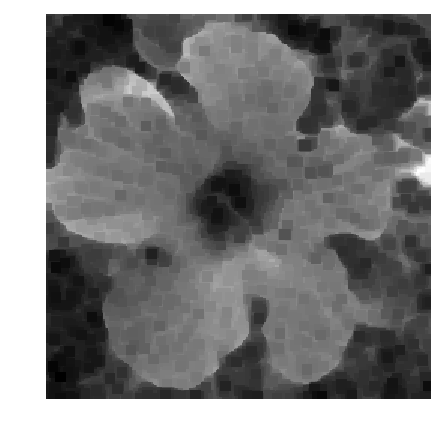

In [29]:
closing = f -> phi(f, 0)
figure(figsize = (5,5))
imageplot(closing(f))

The case $\beta=1$ corresponds to the opening operator from
mathematical morphology (max filter).

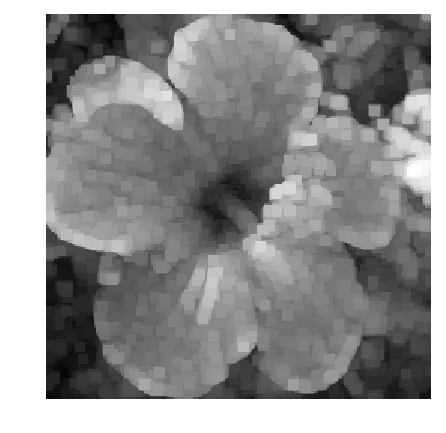

In [30]:
opening = f -> phi(f, 1)
figure(figsize = (5,5))
imageplot(opening(f))

__Exercise 2__

Compute a closing followed by an opening.

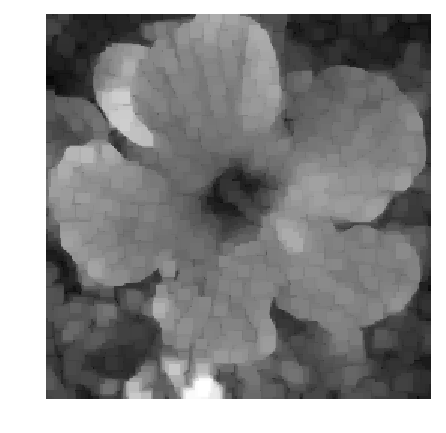

In [31]:
include("NtSolutions/denoisingadv_7_rankfilters/exo2.jl")

In [24]:
## Insert your code here.

__Exercise 3__

Compute an opening followed by a closing.

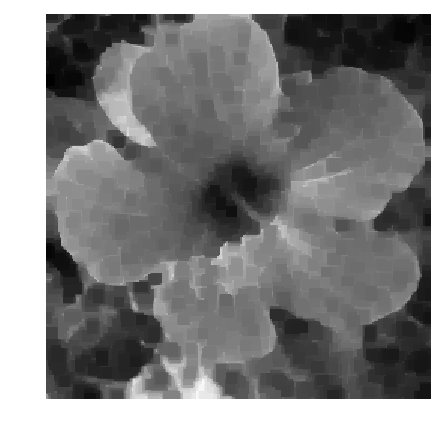

In [32]:
include("NtSolutions/denoisingadv_7_rankfilters/exo3.jl")

In [26]:
## Insert your code here.

__Exercise 4__

Perform iterated opening and closing.

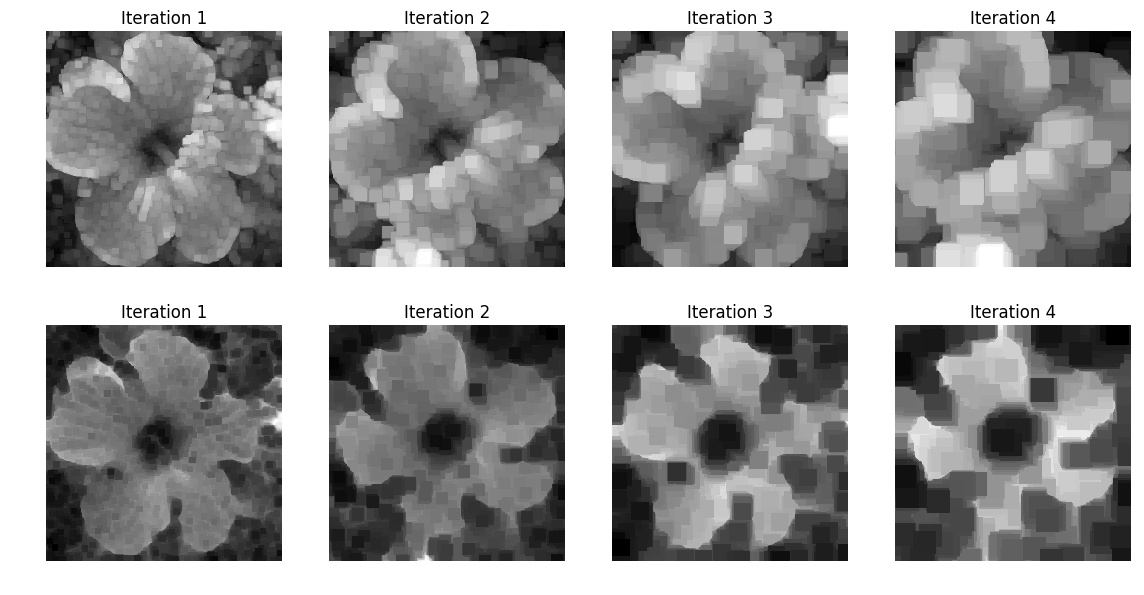

In [33]:
include("NtSolutions/denoisingadv_7_rankfilters/exo4.jl")

In [28]:
## Insert your code here.

Median Filter
-------------
The median filter corresponds to the case where $\be=1/2$.

In [34]:
medfilt = f -> phi(f, 1/2)
medfilt(f);

256×256 Array{Float64,2}:
 0.156526   0.156751   0.157416   …  0.2474     0.255677   0.204699 
 0.156526   0.156751   0.16456       0.2474     0.2474     0.238564 
 0.156354   0.149025   0.156526      0.236931   0.2474     0.238564 
 0.148446   0.147951   0.149025      0.240488   0.255677   0.2474   
 0.149025   0.149025   0.156354      0.238564   0.240488   0.238564 
 0.156354   0.156751   0.16456    …  0.234112   0.230995   0.230995 
 0.156354   0.156751   0.159248      0.237907   0.238564   0.237907 
 0.159248   0.159248   0.165663      0.240488   0.257253   0.239054 
 0.170467   0.170467   0.175262      0.279026   0.279859   0.279859 
 0.18562    0.175025   0.18562       0.286175   0.279859   0.279859 
 0.189609   0.188607   0.188607   …  0.259965   0.259965   0.259965 
 0.228297   0.228297   0.211038      0.239249   0.250736   0.250736 
 0.234702   0.231974   0.228297      0.233755   0.239249   0.237907 
 ⋮                                ⋱                        ⋮        
 0.13452

Display the result.

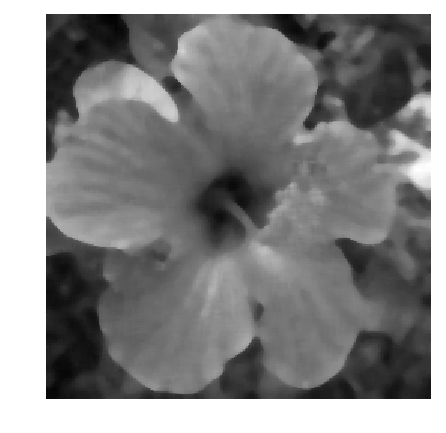

In [35]:
figure(figsize = (5,5))
imageplot(medfilt(f))

Iterated median filtering computes
$$ f^{(\ell+1)} = \phi_{1/2}^B( f^{(\ell)} ). $$

In the case where $f$ is of class $C^3$ and $\nabla f(x) \neq 0$,
one has the following Taylor expansion
$$ \phi_{1/2}^{B_\epsilon}(x) =
  f(x) + \frac{\epsilon^2}{6} \norm{\nabla f(x)}
      \text{Curv}(f)(x) + O(\epsilon^{7/3}) $$
where the curvature operator is
$$ \text{Curv}(f) = \text{div}\pa{
      \frac{\nabla f}{\norm{\nabla f}}
  }. $$


Intuitively, it means that if one iterates the operator
$ \phi_{1/2}^{B_\epsilon} $ with a proper re-scaling $\ell \leftrightarrow t$
and when
$\epsilon \rightarrow 0$, then $f^{(\ell)}$ tends to the solution to the
famous mean-curvature motion PDE
$$ \pd{f}{t} = \norm{\nabla f} \text{Curv}(f).  $$


This conjecture was initially mentionned in [BeMerOsh92](#biblio).
This was rigorously proved in [Ishii95](#biblio), [BarGeorg](#biblio),
[Evans93](#biblio) using the machinery of viscosity solutions.


Similar result holds for other class of contrast invariant operator, see
for instance [Cao98](#biblio) for affine invariant operators, and [GuiMoRy04](#biblio)
for an axiomatic and general framework.

__Exercise 5__

Perform iterated median filtering, and store the output in $f_1$.

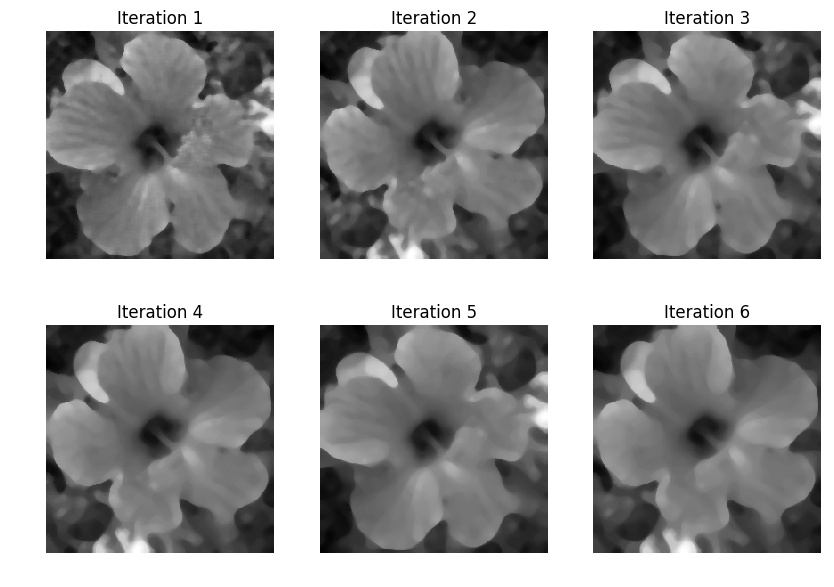

In [36]:
include("NtSolutions/denoisingadv_7_rankfilters/exo5.jl")

In [32]:
## Insert your code here.

Display.

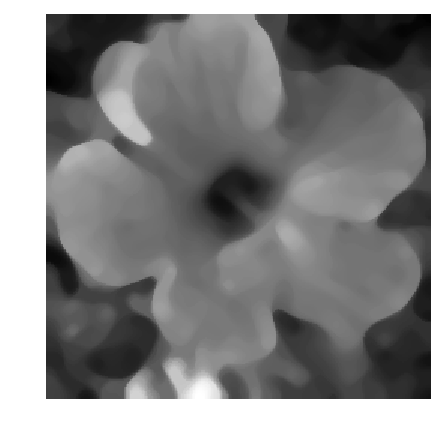

In [37]:
figure(figsize = (5,5))
imageplot(f1)

Bibliography
------------
<html><a name="biblio"></a></html>


* [Matheron75] G. Matheron, [Random Sets and Integral Geometry][1], Wiley, New York, 1975
* [Serra82] J. Serra, [Image Analysis and Mathematical Morphology][2], Academic Press, London, 1982
* [Tukey77] J. W. Tukey, [Exploratory Data Analysis][3]. Addison-Wesley, Reading, MA, 1977
* [BeMerOsh92] J. Bence, B. Merriman, S. Osher, [Diffusionn generated motion by mean curvature][4], Selected Lectures in Math. Amer. Math. Soc., Providence, 1992
* [Cao98] F. Cao, [Partial differential equations and mathematical morphology][5]. J.Math. Pures Appl. 77 909?941, 1998
* [Ishii95] H. Ishii, _A generalization of the Bence, Merriman and Osher algorithm for motion by mean curvature_, 1995
* [BarGeorg] G. Barles and C. Georgelin, [A Simple Proof of Convergence for an Approximation Scheme for Computing Motions by Mean Curvature][6], SIAM J. Numer. Anal., 32(2), 484?500, 1995.
* [Evans93] L. C. Evans, [Convergence of an algorithm for mean curvature motion][7], Indiana Univ. Math. J., 42, pp. 533?557, 1993.
* [GuiMoRy04] F. Guichard, J-M. Morel and Robert Ryan, _Contrast invariant image analysis and PDE's_, 2004.
* [CasSapChu00] V. Caselles, G. Sapiro and D. H. Chung, [Vector median filters, inf-sup operations, and coupled PDEs: Theoretical connections][8]. J. Math. Imaging Vision 12 109?119, 2000
* [Piterbarg84] L. I. Piterbarg, [Median filtering of random processes][9], Problemy Peredachi Informatsii, 20, 65?73, 1984.
* [FanHall94] J. Fan and P. Hall, [On curve estimation by minimizing mean absolute deviation and its implications][10]. Ann. Statist. 22 867?885, 1994.
* [AriasDon99] E. Arias-Castro and D. L. Donoho, [Does the median filter truly preserve edges better than linear filtering?][11], The Annals of Statistics, Vol. 37, No. 3, 1172-1206, 2009.



[1]:http://books.google.fr/books/about/Random_sets_and_integral_geometry.html?hl=fr&id=bgzvAAAAMAAJ
[2]:http://dl.acm.org/citation.cfm?id=1098652
[3]:http://books.google.fr/books/about/Exploratory_Data_Analysis.html?hl=fr&id=UT9dAAAAIAAJ
[4]:http://books.google.fr/books/about/Diffusion_Generated_Motion_by_Mean_Curva.html?id=DYi-GwAACAAJ&redir_esc=y
[5]:http://dx.doi.org/10.1016/S0021-7824(01)80003-9
[6]:http://dx.doi.org/10.1137/0732020
[7]:http://cat.inist.fr/?aModele=afficheN&cpsidt=3899933
[8]:http://dx.doi.org/10.1023/A:1008310305351
[9]:http://www.mathnet.ru/php/archive.phtml?wshow=paper&jrnid=ppi&paperid=1122&option_lang=eng
[10]:http://dx.doi.org/10.1214/aos/1176325499
[11]:http://dx.doi.org/10.1214/08-AOS604